In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
import scipy.integrate
import warnings
from colossus.cosmology import cosmology

In [7]:
size = 35
#size = 75

plt.rcParams.update({
    # taglia della figura
    'figure.figsize': (11,8),

    # font
    'text.usetex': True,
    'font.family': 'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,

    # assi
    'axes.labelsize': size,
    'axes.titlesize': size,
    'axes.linewidth': 2,

    # ticks
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.pad': 15,
    'xtick.major.size': 4,
    'ytick.major.size': 4,
    'xtick.minor.size': 3,
    'ytick.minor.size': 3,
    'xtick.major.width': 0.8,
    'ytick.major.width': 0.8,
    'xtick.minor.width': 0.6,
    'ytick.minor.width': 0.6,    

    # legenda
    'legend.loc': 'best',
    'legend.fontsize': size,

    # plots
    'lines.linewidth': 1.6,
    'scatter.marker': 'o',
    'lines.markersize': 8,
    'scatter.edgecolors': 'black',
})

In [3]:
# dimensions
nk = 100
nz = 20
nc = 2000
ncv = 1000

In [4]:
# i plot di questo notebook hanno un k fisso, in unità di h/Mpc
kk = np.logspace(-4, np.log10(3), nk)*0.67810
zz = np.linspace(0, 5, nz)

$$ NN(k,z) = \frac{P_{CLASS}(k,z)}{P_{prim}(k) \, T_{Pedro}^2(k) \, \mu_{PySR}^2(k,z)} $$

In [5]:
# carico e aggiusto tutti i parametri con validation dataset

prediz_nn = np.load('../files/pred_nn+sr_' + str(ncv) + '.npy')
print('Dim predizione rete: ', prediz_nn.shape)

prim = np.load('../files/val_prim_emul_' + str(ncv) + '.npy')
print('Dim spettro primordiale: ', prim.shape)

tf2 = np.load('../files/val_tf2_emul_' + str(ncv) + '.npy')
print('Dim transfer: ', tf2.shape)

print()

pred_nn = np.reshape(prediz_nn.T, [ncv,nk,nz])
print('Dim predizione rete aggiustata: ', pred_nn.shape)

pkz_class = np.load('../files/val_pkz_emul_' + str(ncv) + '.npy')
print('Dim spettro CLASS: ', pkz_class.shape)

mu2 = np.load('../files/val_mu2_emul_' + str(ncv) + '.npy')
print('Dim mu: ', mu2.shape)

pkz_prim = np.zeros([ncv,nk,nz])
transfer2 = np.zeros([ncv,nk,nz])
for i in range(nz) :
    pkz_prim[:,:,i] = prim
    transfer2[:,:,i] = tf2
print('Dim transfer aggiustata: ', transfer2.shape)
print('Dim primordiale aggiustata: ', pkz_prim.shape)

pkz_pred = pred_nn * pkz_prim * transfer2 * mu2
print('Dim spettro predetto: ', pkz_pred.shape)

Dim predizione rete:  (2000, 1000)
Dim spettro primordiale:  (1000, 100)
Dim transfer:  (1000, 100)

Dim predizione rete aggiustata:  (1000, 100, 20)
Dim spettro CLASS:  (1000, 100, 20)
Dim mu:  (1000, 100, 20)
Dim transfer aggiustata:  (1000, 100, 20)
Dim primordiale aggiustata:  (1000, 100, 20)
Dim spettro predetto:  (1000, 100, 20)


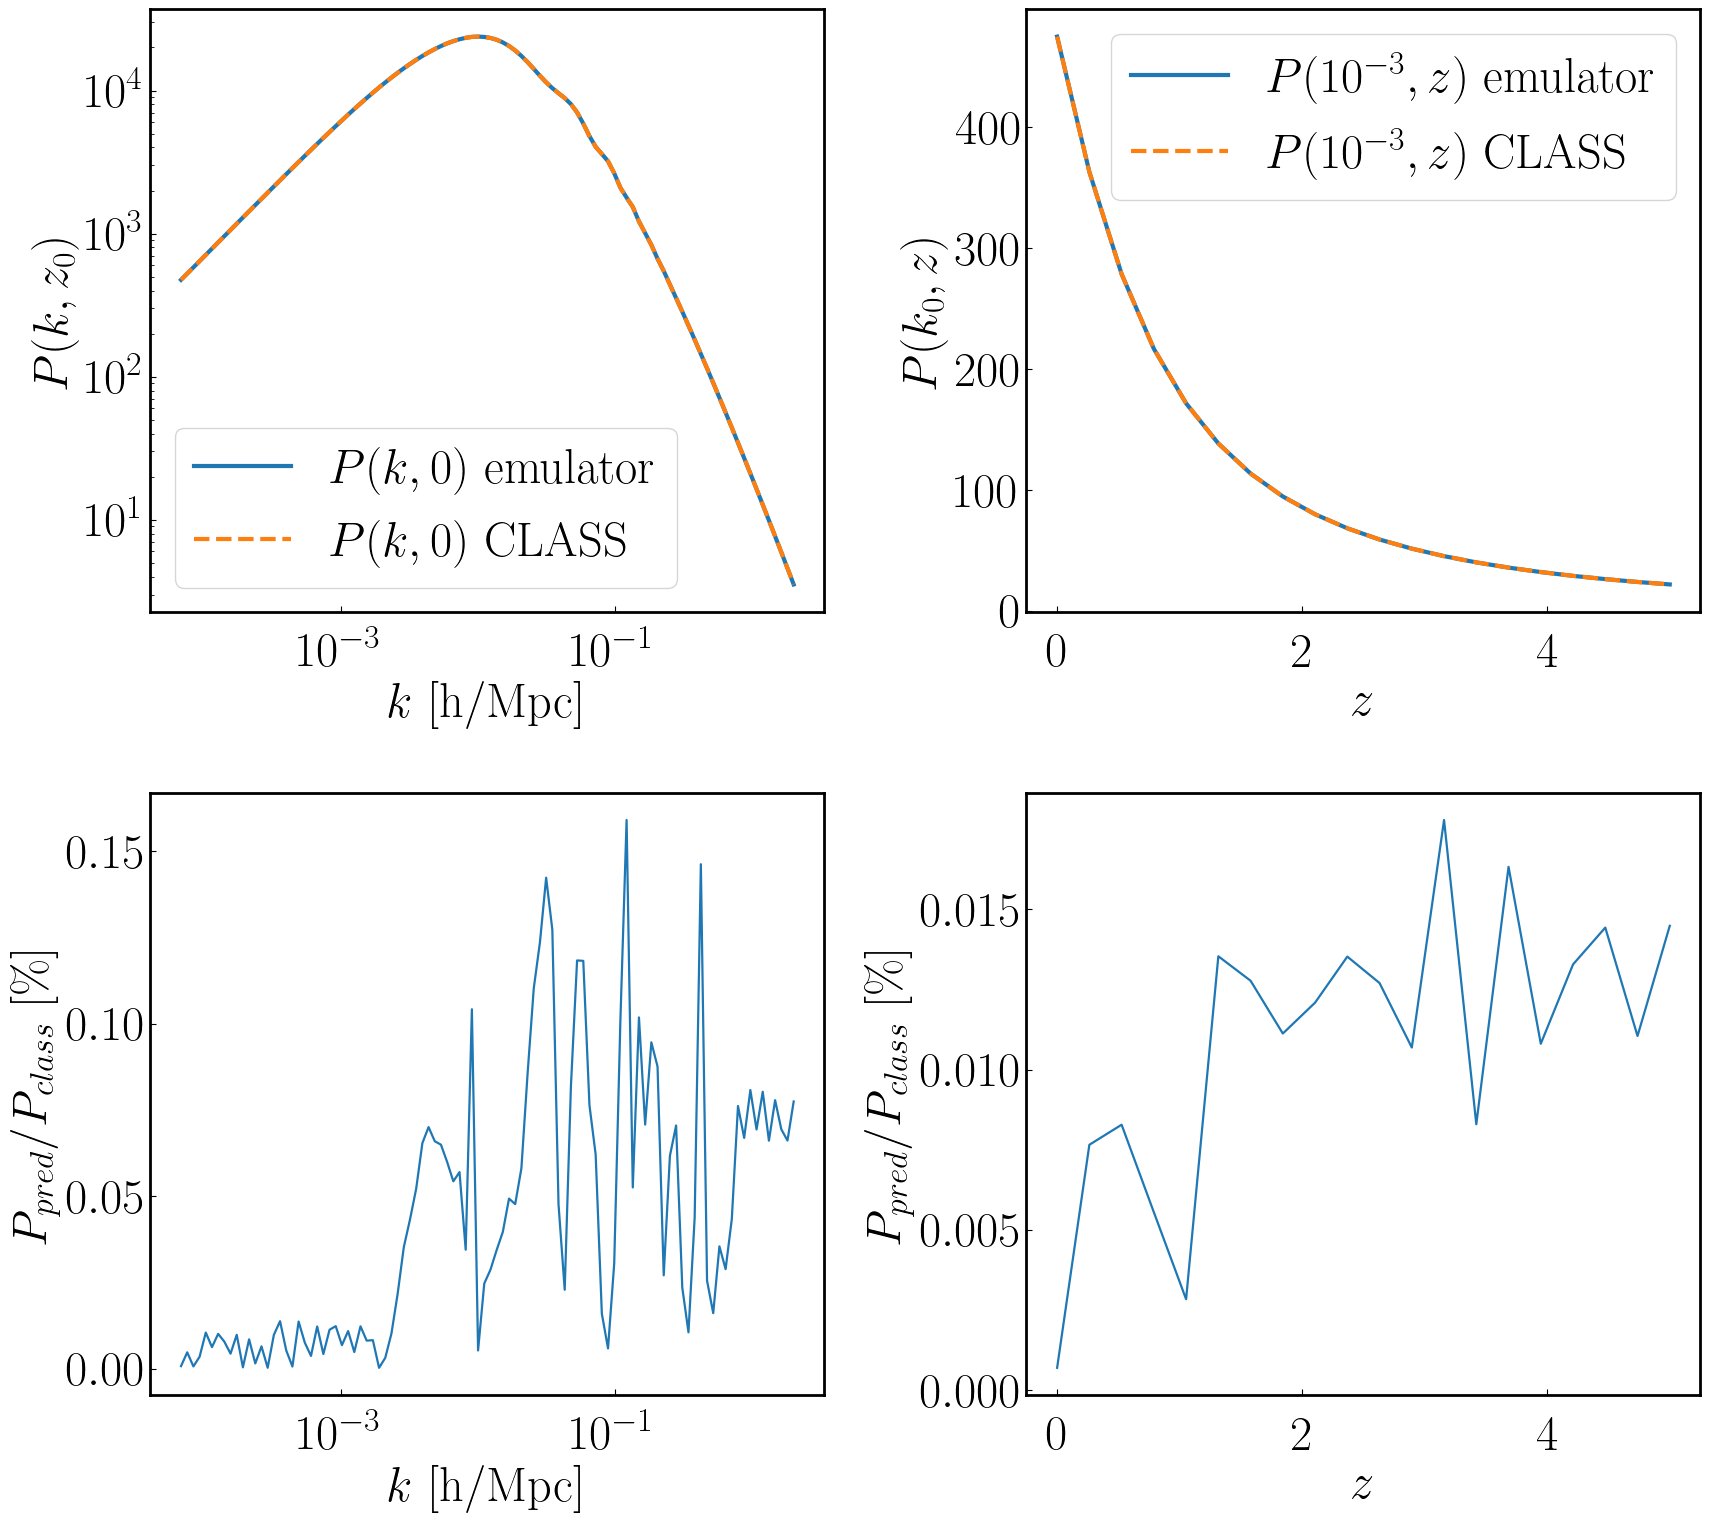

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(20, 18), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})


axs[0,0].loglog(kk, pkz_pred[0,:,0], linewidth=3, label='$P(k,0)$ emulator')
axs[0,0].loglog(kk, pkz_class[0,:,0], linewidth=3, linestyle='--', label='$P(k,0)$ CLASS')

axs[0,0].set_xlabel('$k$ [h/Mpc]')
axs[0,0].set_ylabel('$P(k,z_0)$')
#axs[0,0].set_title()
axs[0,0].legend()


axs[0,1].plot(zz, pkz_pred[0,0,:], linewidth=3, label='$P(10^{-3},z)$ emulator')
axs[0,1].plot(zz, pkz_class[0,0,:], linewidth=3, linestyle='--', label='$P(10^{-3},z)$ CLASS')

axs[0,1].set_xlabel('$z$')
axs[0,1].set_ylabel('$P(k_0,z)$')
axs[0,1].legend()


axs[1,0].semilogx(kk, 100*np.abs(1 - pkz_pred[0,:,0]/pkz_class[0,:,0]))

axs[1,0].set_xlabel('$k$ [h/Mpc]')
axs[1,0].set_ylabel('$P_{pred}/P_{class}$ [\%]')


axs[1,1].plot(zz, 100*np.abs(1 - pkz_pred[0,0,:]/pkz_class[0,0,:]))

axs[1,1].set_xlabel('$z$')
axs[1,1].set_ylabel('$P_{pred}/P_{class}$ [\%]')

plt.savefig('../plots/pkz_combined_nn+sr.pdf')
plt.show()

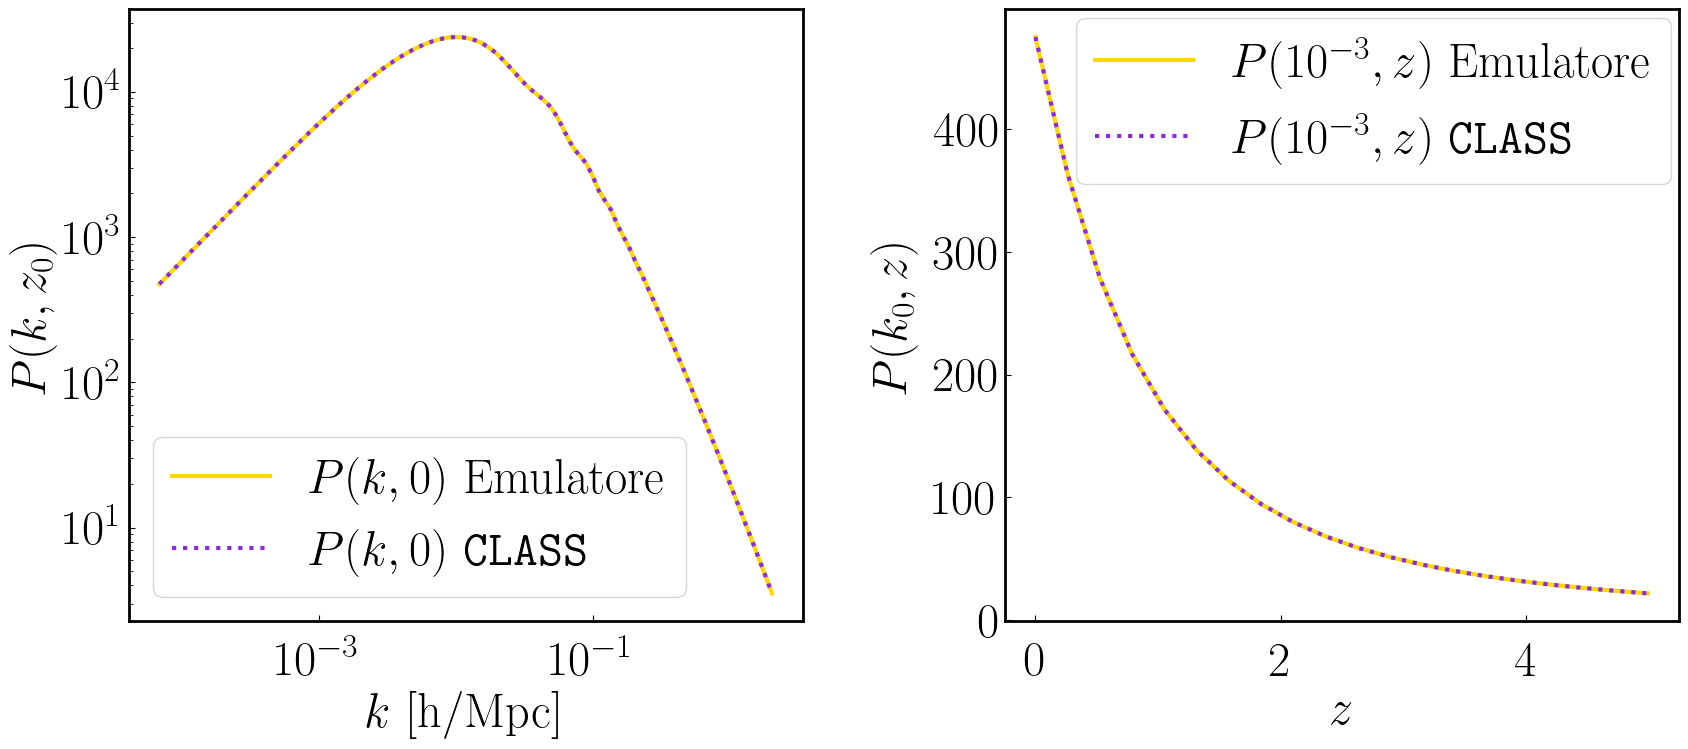

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(20, 9), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})


axs[0].loglog(kk, pkz_pred[0,:,0], linewidth=3, label='$P(k,0)$ Emulatore', color='gold')
axs[0].loglog(kk, pkz_class[0,:,0], linewidth=3, linestyle=':', label=r'$P(k,0)$ \texttt{CLASS}', color='blueviolet')

axs[0].set_xlabel('$k$ [h/Mpc]')
axs[0].set_ylabel('$P(k,z_0)$')
#axs[0].set_title()
axs[0].legend()


axs[1].plot(zz, pkz_pred[0,0,:], linewidth=3, label='$P(10^{-3},z)$ Emulatore', color='gold')
axs[1].plot(zz, pkz_class[0,0,:], linewidth=3, linestyle=':', label=r'$P(10^{-3},z)$ \texttt{CLASS}', color='blueviolet')

axs[1].set_xlabel('$z$')
axs[1].set_ylabel('$P(k_0,z)$', labelpad=10)
axs[1].legend(loc='upper right', bbox_to_anchor=(1.025, 1.025))

plt.subplots_adjust(bottom=0.2)

plt.savefig('../plots/pkz_nn+sr.pdf')
plt.show()


In [17]:
# preparo il plot delle differenze percentuali con il training dataset

diffk = np.zeros([nz,nk])
diffz = np.zeros([nk,nz])

for i in range(nk) :
    diffk[:,i] = 100 * np.abs(1 - pkz_pred[0,i,:]/pkz_class[0,i,:])
diffk = np.sort(diffk, axis=0)

for i in range(nz) :
    diffz[:,i] = 100 * np.abs(1 - pkz_pred[0,:,i]/pkz_class[0,:,i])
diffz = np.sort(diffz, axis=0)


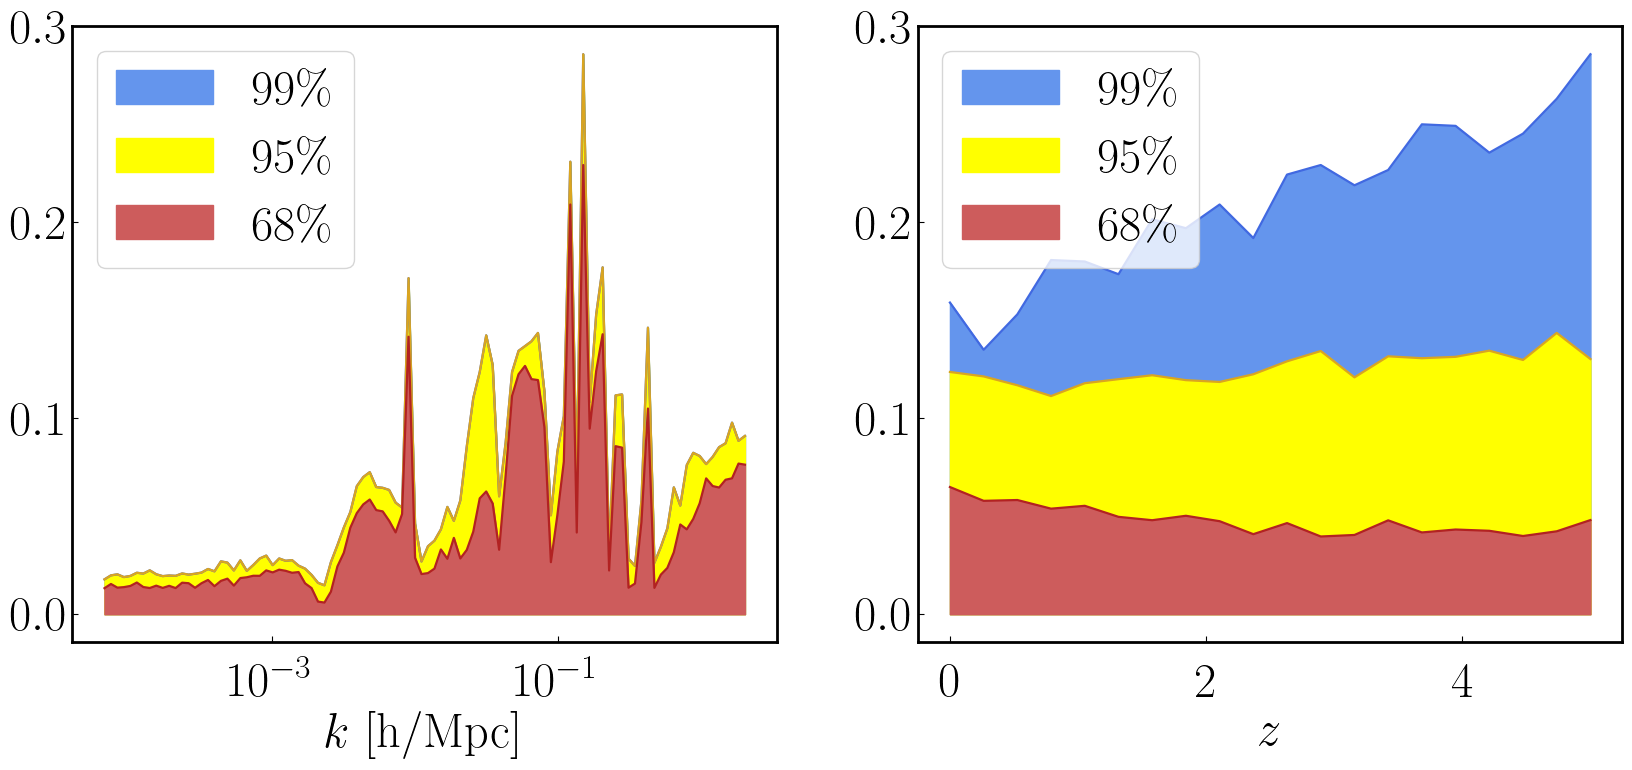

In [18]:

fig, axs = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})

x = [kk,zz]
diff = [diffk,diffz]

for i in range(2) :
    ind99 = int((diff[i].shape[0]/100)*99)
    axs[i].plot(x[i], diff[i][ind99,:], color='royalblue')
    axs[i].fill_between(x[i], diff[i][ind99,:], color='cornflowerblue', label='$99\%$')
    
    ind95 = int((diff[i].shape[0]/100)*95)
    axs[i].plot(x[i], diff[i][ind95,:], color='goldenrod')
    axs[i].fill_between(x[i], diff[i][ind95,:], color='yellow', label='$95\%$')
    
    ind68 = int((diff[i].shape[0]/100)*68)
    axs[i].plot(x[i], diff[i][ind68,:], color='firebrick')
    axs[i].fill_between(x[i], diff[i][ind68,:], color='indianred', label='$68\%$')
    
    axs[i].legend()
    axs[0].set_xscale('log')
    axs[0].set_xlabel('$k$ [h/Mpc]')
    axs[1].set_xlabel('$z$')

plt.savefig('../plots/diff_pkz_nn+sr.pdf')
plt.show()


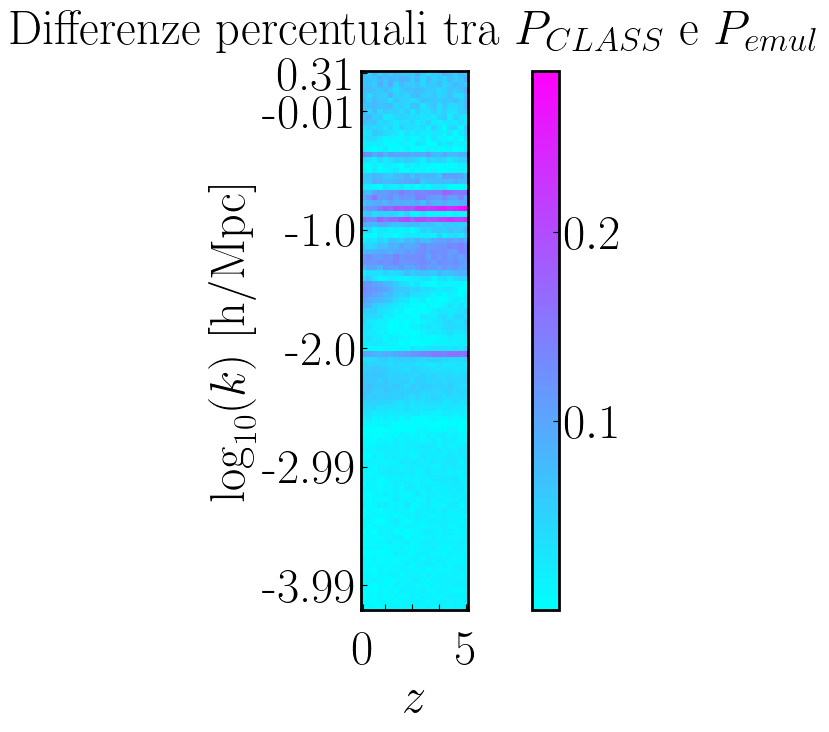

In [20]:
# provo a fare una heatmap

diffs = np.zeros([nk,nz])

for k in range(nk) :
    for z in range (nz) :
        diffs[k,z] = 100 * np.abs(1 - pkz_pred[0,k,z]/pkz_class[0,k,z])

plt.figure(figsize=(8,7))
plt.imshow(diffs, origin='lower', cmap='cool')

plt.xlabel('$z$')
zindex = np.linspace(0,19,5).astype(int)
plt.xticks(zindex, labels=[int(zz[zindex[0]]), None,None,None, int(zz[zindex[-1]])])

plt.ylabel('$\log_{10}(k)$ [h/Mpc]')
#kindex = np.linspace(0,99,3).astype(int)
#plt.yticks(kindex, np.around(np.log10(kk[kindex]), 2))
ktarget = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1, 3])
kindex = np.array([np.argsort(np.abs(kk - val))[0] for val in ktarget])
plt.yticks(kindex, np.around(np.log10(kk[kindex]), 2))

plt.title(r'Differenze percentuali tra $P_{CLASS}$ e $P_{emul}$', pad=20)

#plt.subplots_adjust(right=0.8)
plt.subplots_adjust(left=-0.7)

plt.colorbar()

plt.savefig('../plots/diff_pkz_nn+sr_hmap.pdf')
plt.show()


In [32]:
size = 75

plt.rcParams.update({
    'axes.labelsize': size,
    'axes.titlesize': size,
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'legend.fontsize': size,

    'xtick.major.size': 10,
    'ytick.major.size': 10,
    'xtick.minor.size': 5,
    'ytick.minor.size': 5,
    'xtick.major.width': 2,
    'ytick.major.width': 2,
    'xtick.minor.width': 1,
    'ytick.minor.width': 1,
})

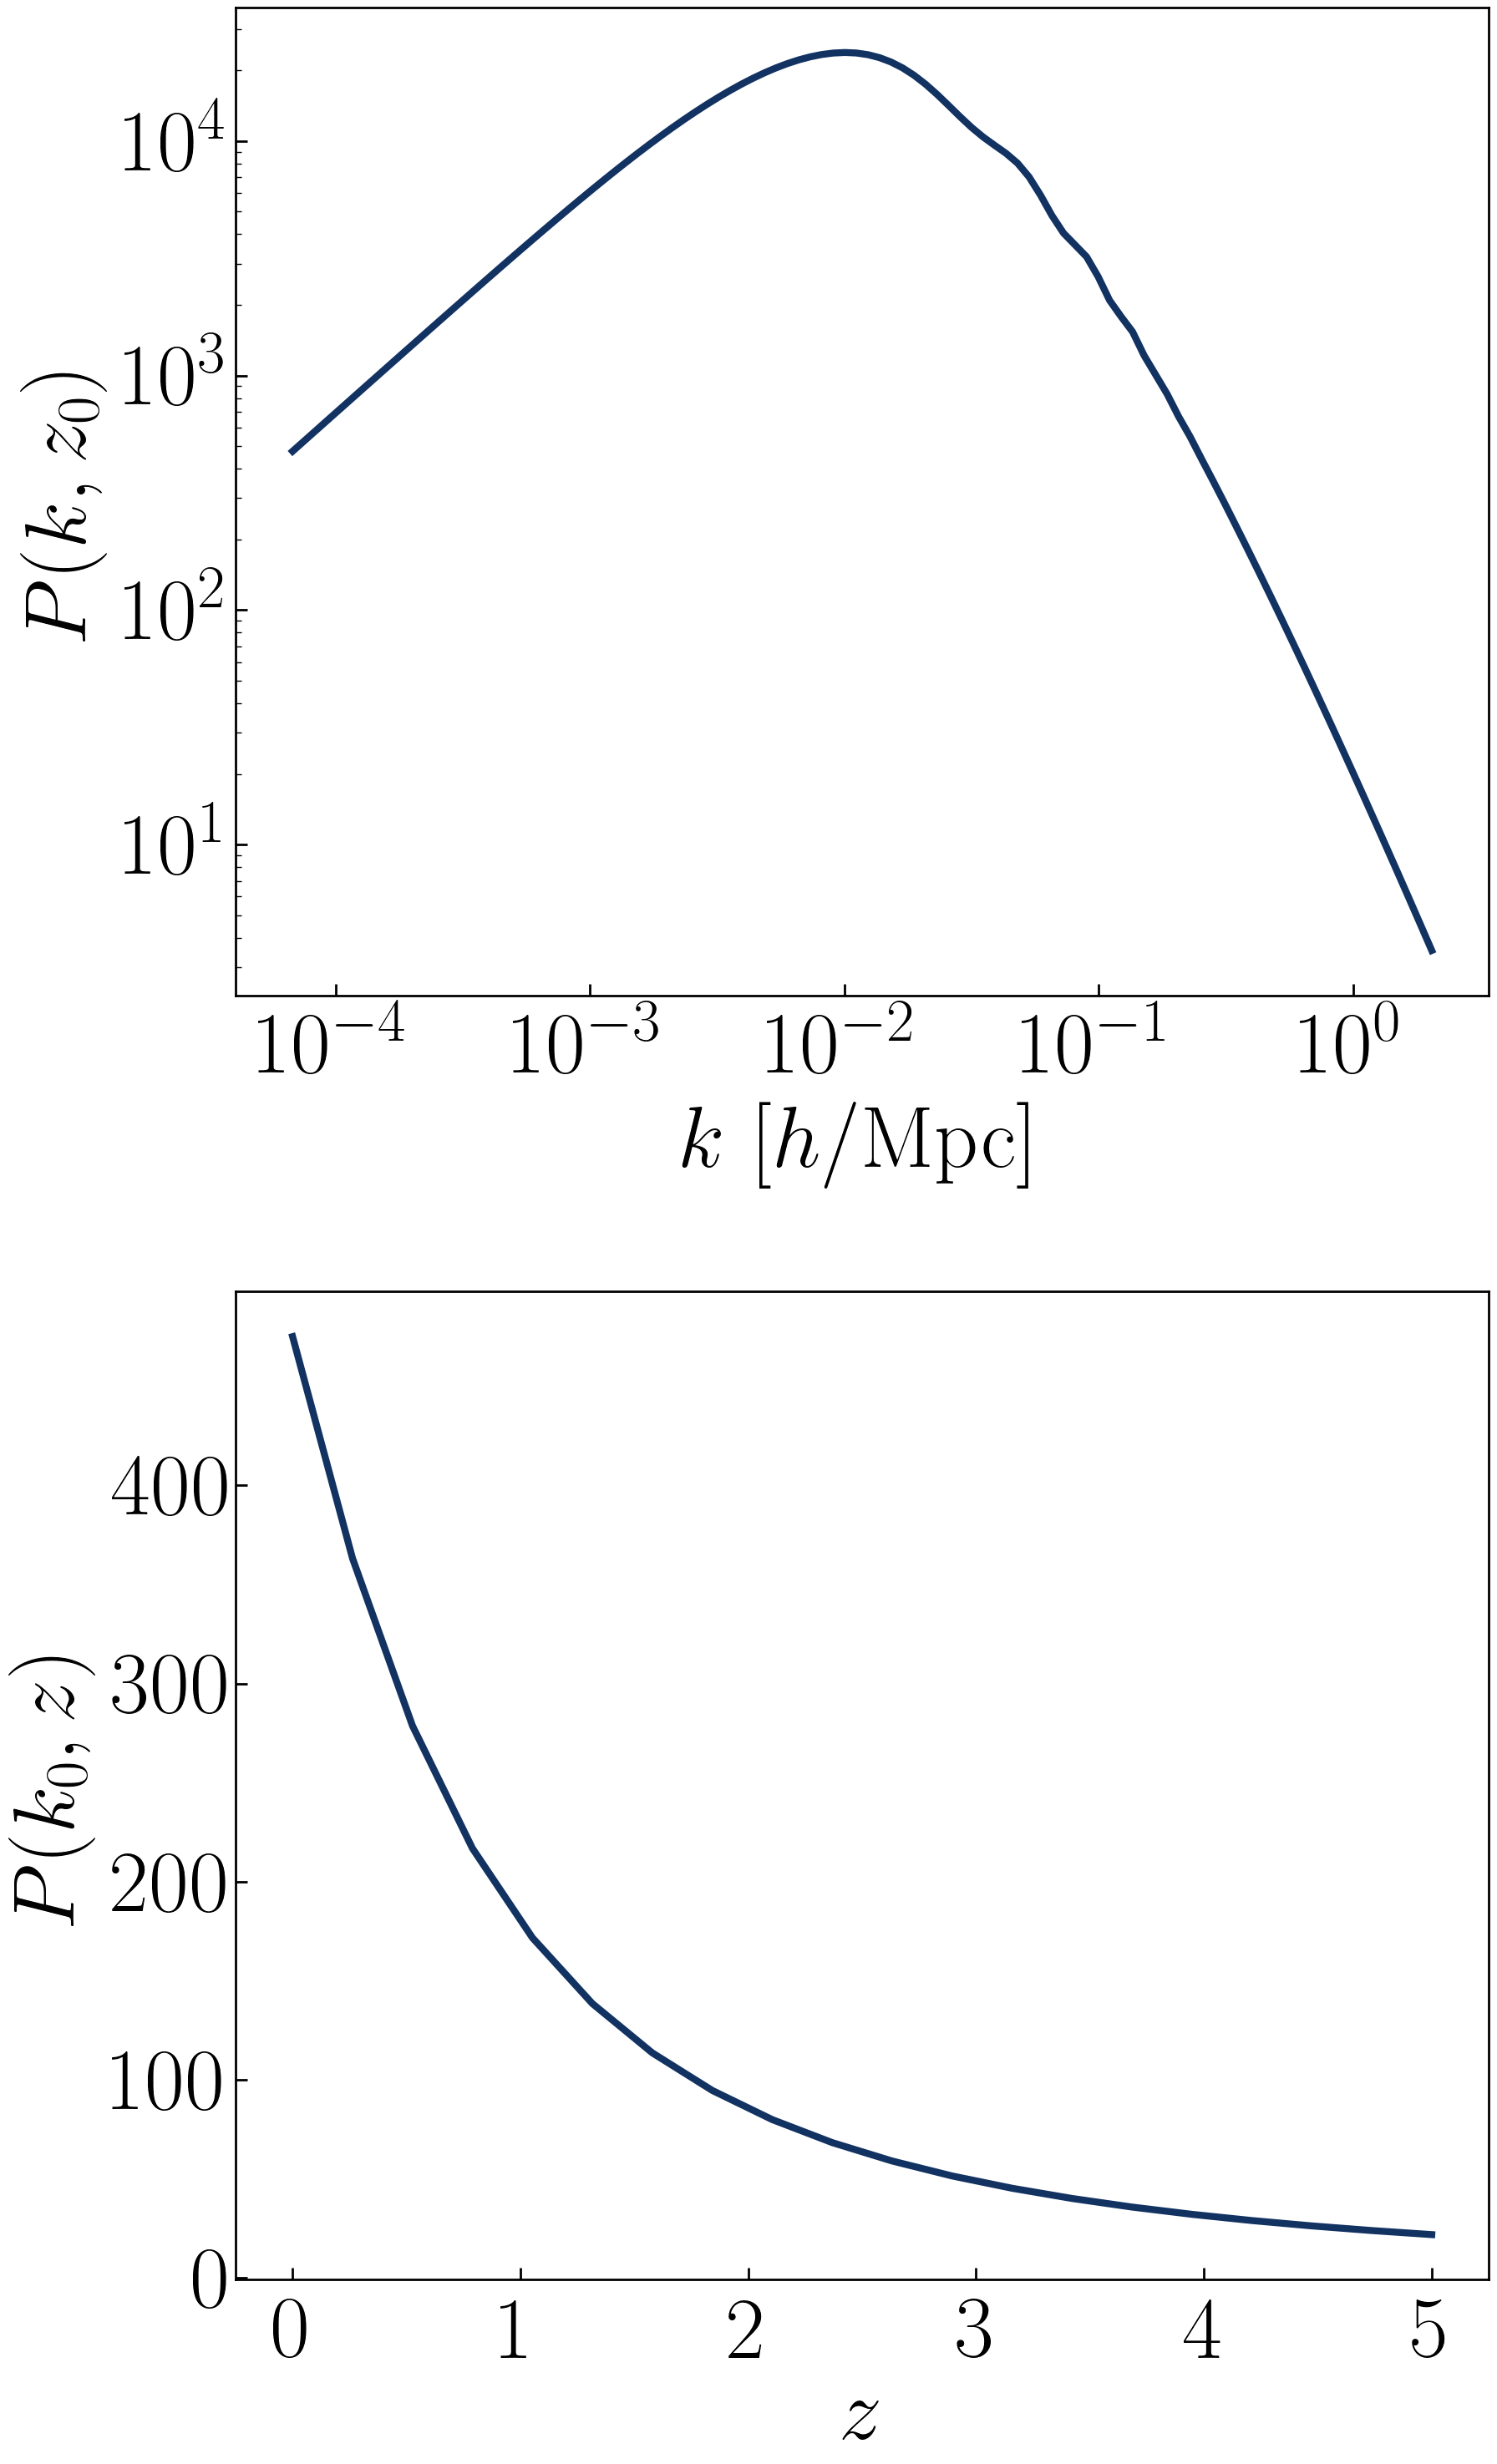

In [33]:

fig, axs = plt.subplots(2, 1, figsize=(20, 40), gridspec_kw={'hspace': 0.3, 'wspace': 0.1})

axs[0].loglog(kk, pkz_class[0,:,0], linewidth=6, color='#123262')

axs[0].set_xlabel('$k$ [$h$/Mpc]', labelpad=10)
axs[0].set_ylabel('$P(k,z_0)$', labelpad=15)
axs[0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])

axs[1].plot(zz, pkz_class[0,0,:], linewidth=6, color='#123262')

axs[1].set_xlabel('$z$')
axs[1].set_ylabel('$P(k_0,z)$', labelpad=15)
axs[1].set_xticks([0,1,2,3,4,5])

plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.15)

plt.savefig('../plots/present_pkz.pdf')
plt.show()


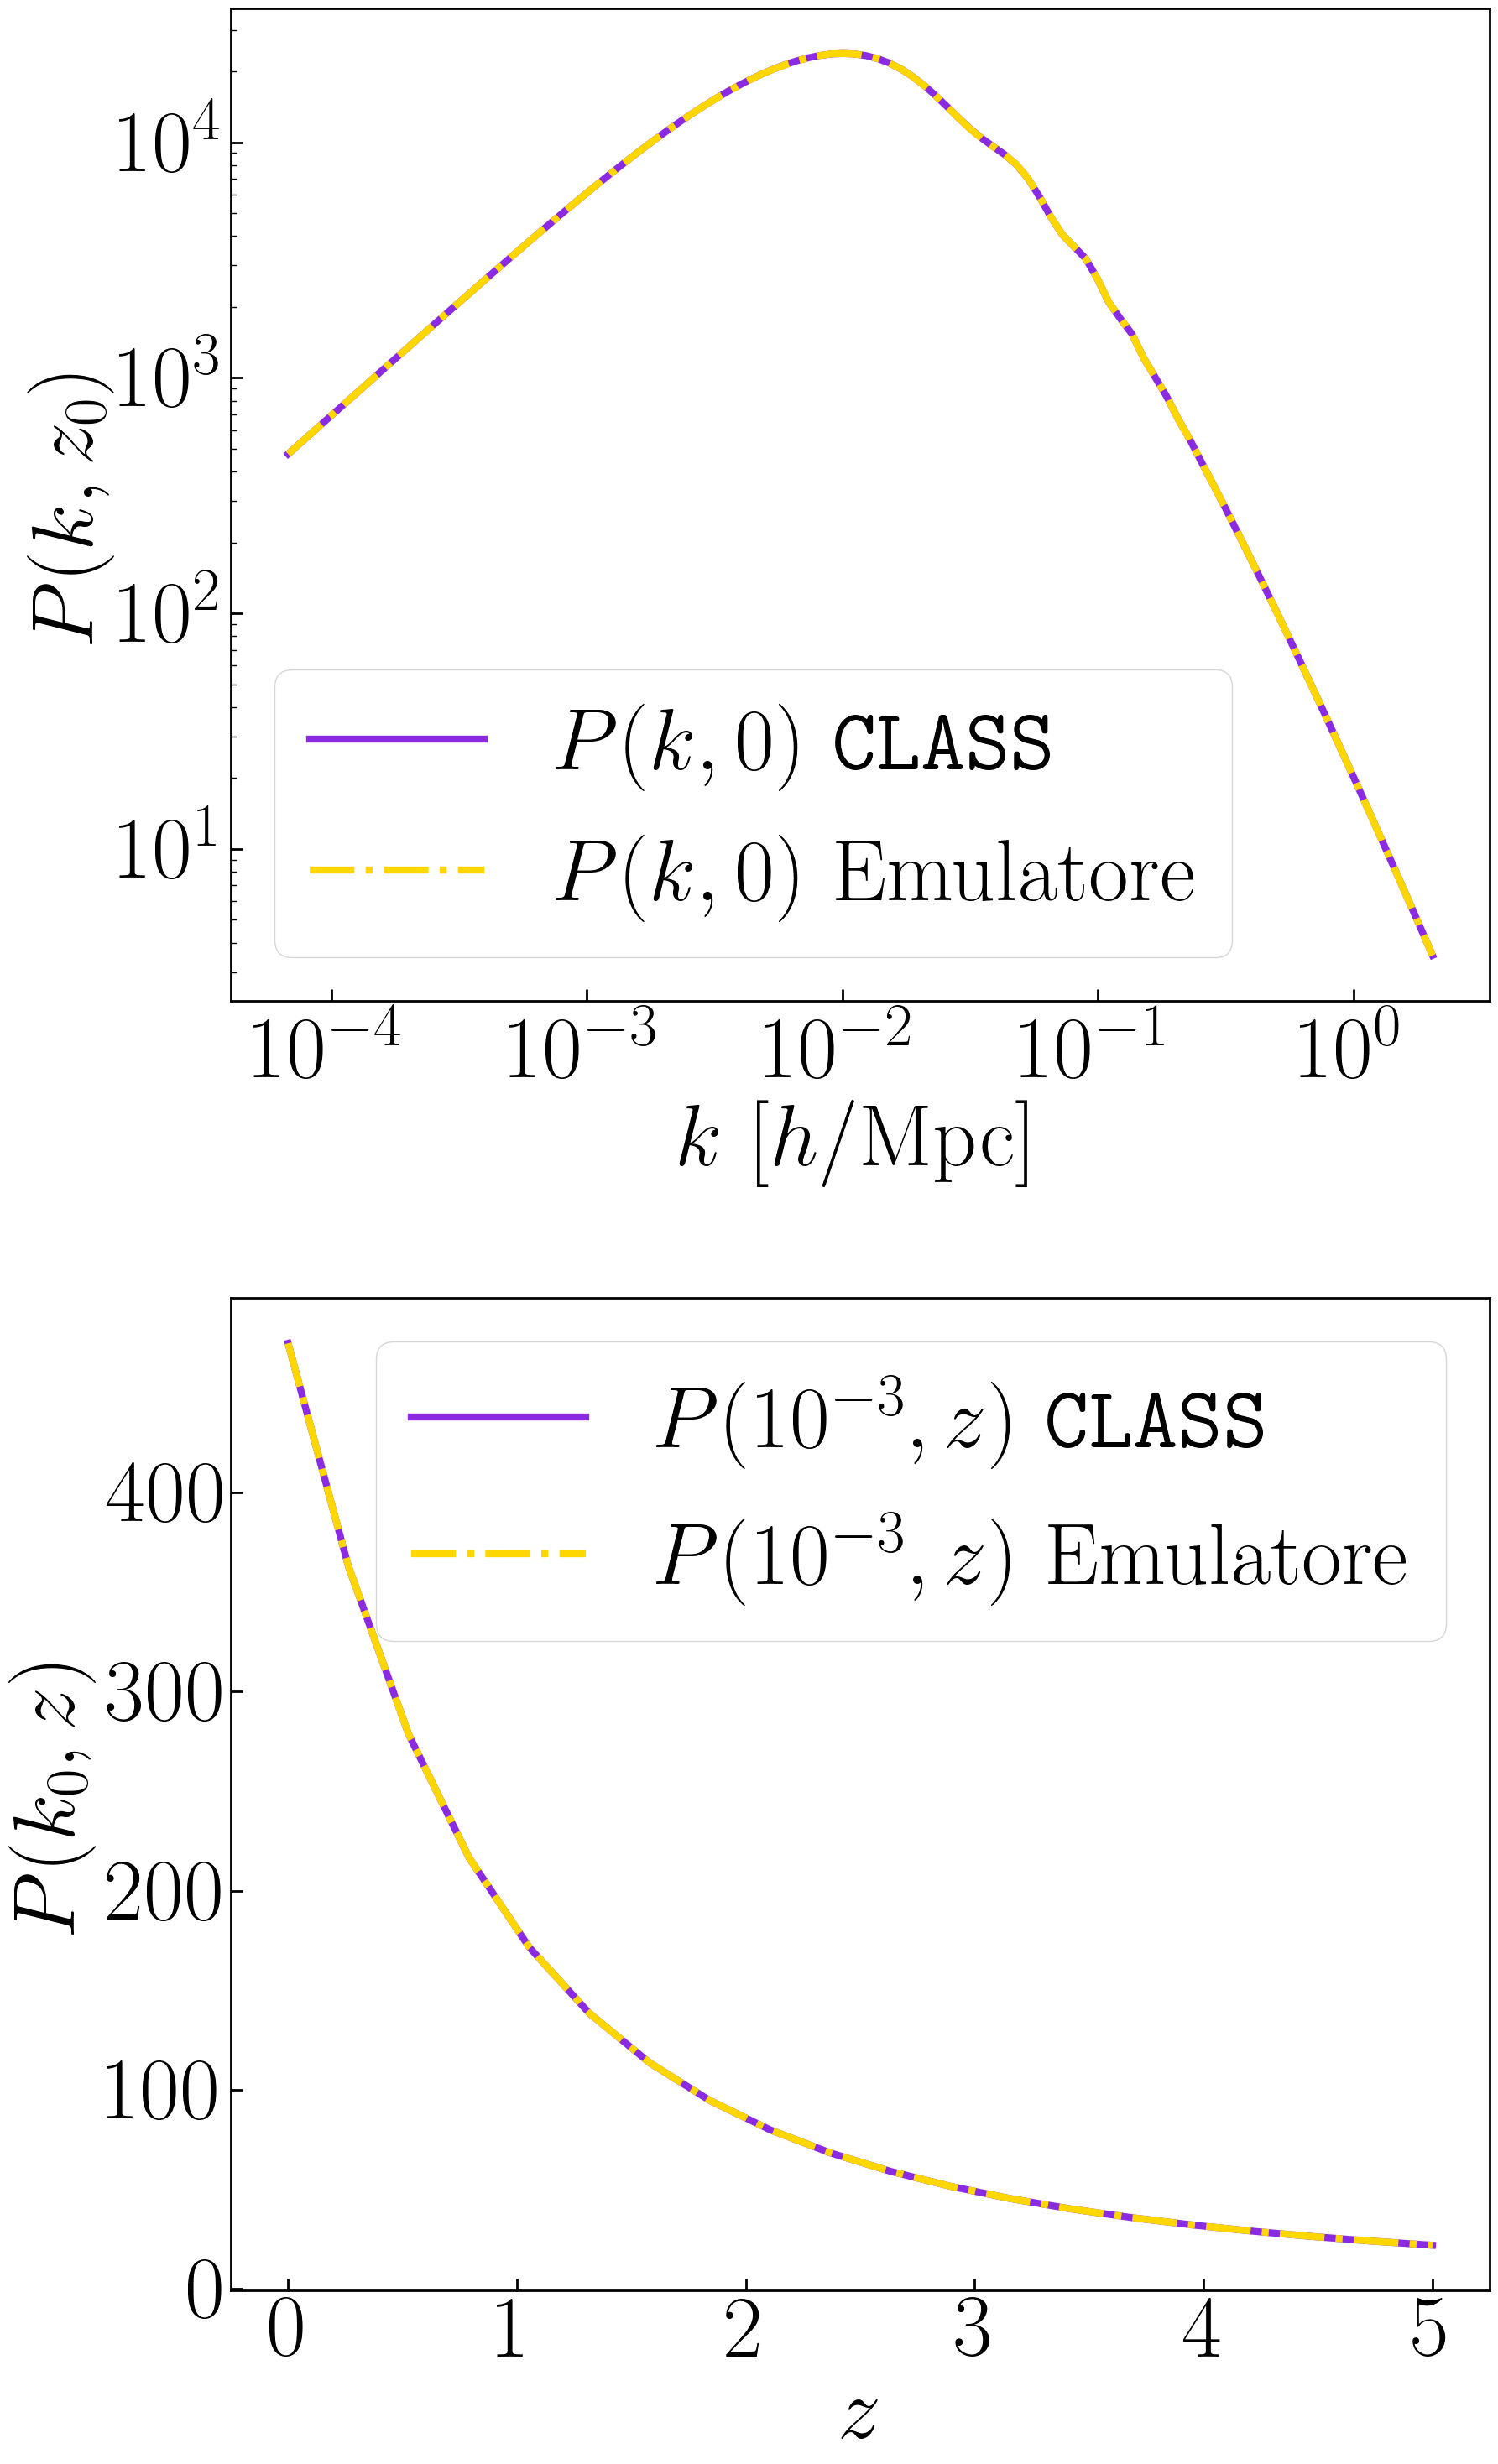

In [34]:

fig, axs = plt.subplots(2, 1, figsize=(20, 40), gridspec_kw={'hspace': 0.3, 'wspace': 0.3})


axs[0].loglog(kk, pkz_class[0,:,0], linewidth=6, label=r'$P(k,0)$ \texttt{CLASS}', color='blueviolet')
axs[0].loglog(kk, pkz_pred[0,:,0], linewidth=6, linestyle='-.', label='$P(k,0)$ Emulatore', color='gold')

axs[0].set_xlabel('$k$ [$h$/Mpc]')
axs[0].set_ylabel('$P(k,z_0)$')
axs[0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
axs[0].legend()


axs[1].plot(zz, pkz_class[0,0,:], linewidth=6, label=r'$P(10^{-3},z)$ \texttt{CLASS}', color='blueviolet')
axs[1].plot(zz, pkz_pred[0,0,:], linewidth=6, linestyle='-.', label='$P(10^{-3},z)$ Emulatore', color='gold')

axs[1].set_xlabel('$z$')
axs[1].set_ylabel('$P(k_0,z)$', labelpad=10)
axs[1].set_xticks([0,1,2,3,4,5])
axs[1].tick_params(axis='x', pad=5)
axs[1].legend()
#axs[1].legend(loc='upper right', bbox_to_anchor=(1.025, 1.025))

plt.subplots_adjust(bottom=0.2)
plt.subplots_adjust(left=0.15)

plt.savefig('../plots/present_pkz_nn+sr.pdf')
plt.show()
